In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data to inspect its structure and start the analysis
file_path = '/Users/kudzanaikutsanzira/Downloads/rural_population_data_202411111544.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
display(data.head())
data.info()

,country_name,year,individuals_using_internet_population,population_total,population_growth_percent,rural_population_percent,access_to_electricity_rural_percent,gdp_constant_2015_us$,gdp_per_capita_current_us$,carbon_dioxide_emissions_excl_lulucf_percapita_tco2ecapita,access_to_electricity_percent
0,Angola,2012,7.7000,25188292.0,3.758703,38.732,13591.157631,8.148852e+10,5083.826873,0.959898,37.3
1,Angola,2013,13.0000,26147002.0,3.735525,37.998,4776.231938,8.552596e+10,5061.349253,1.063709,38.4
2,Angola,2014,21.3623,27128337.0,3.684429,37.269,6427.512768,8.965050e+10,5011.984427,1.120054,32.0
3,Angola,2015,22.0000,28127721.0,3.617678,36.554,3.800000,9.049642e+10,3217.339240,1.158871,42.0
4,Angola,2016,23.2000,29154746.0,3.586211,35.851,-68913.145806,8.816151e+10,1809.709377,1.047504,41.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country_name                                                143 non-null    object 
 1   year                                                        143 non-null    int64  
 2   individuals_using_internet_population                       143 non-null    float64
 3   population_total                                            143 non-null    float64
 4   population_growth_percent                                   143 non-null    float64
 5   rural_population_percent                                    143 non-null    float64
 6   access_to_electricity_rural_percent                         143 non-null    float64
 7   gdp_constant_2015_us$                                       143 non-null    float64
 8   

In [3]:


# Drop rows where the country is 'Angola'
data = data[data['country_name'] != 'Angola']

# Calculate correlations
correlation_results_after_dropping_angola = {
    "Urbanization vs GDP per capita": data['rural_population_percent'].corr(data['gdp_per_capita_current_us$']),
    "Electricity Access vs GDP": data['access_to_electricity_percent'].corr(data['gdp_constant_2015_us$']),
    "Rural Electricity Access vs Rural Population": data['access_to_electricity_rural_percent'].corr(data['rural_population_percent']),
    "Internet Users vs GDP per capita": data['individuals_using_internet_population'].corr(data['gdp_per_capita_current_us$']),
    "Population Growth vs Electricity Access": data['population_growth_percent'].corr(data['access_to_electricity_percent']),
    "Total Population vs Urbanization": data['population_total'].corr(data['rural_population_percent']),
}

# Display the correlation results
for key, value in correlation_results_after_dropping_angola.items():
    print(f"{key}: {value}")


Urbanization vs GDP per capita: -0.8396590377449403
Electricity Access vs GDP: 0.44263781432900684
Rural Electricity Access vs Rural Population: 0.0609855576843502
Internet Users vs GDP per capita: 0.0638408426485887
Population Growth vs Electricity Access: -0.4743510726601174
Total Population vs Urbanization: -0.18595522956530736


In [4]:
# Group by country and calculate correlations for each country
country_correlations = {}

for country, group in data.groupby('country_name'):
    country_correlations[country] = {
        "Urbanization vs GDP per capita": group['rural_population_percent'].corr(group['gdp_per_capita_current_us$']),
        "Electricity Access vs GDP": group['access_to_electricity_percent'].corr(group['gdp_constant_2015_us$']),
        "Rural Electricity Access vs Rural Population": group['access_to_electricity_rural_percent'].corr(group['rural_population_percent']),
        "Internet Users vs GDP per capita": group['individuals_using_internet_population'].corr(group['gdp_per_capita_current_us$']),
        "Population Growth vs Electricity Access": group['population_growth_percent'].corr(group['access_to_electricity_percent']),
        "Total Population vs Urbanization": group['population_total'].corr(group['rural_population_percent']),
    }

# Display the results per country
for country, correlations in country_correlations.items():
    print(f"\nCountry: {country}")
    for key, value in correlations.items():
        print(f"{key}: {value}")



Country: Botswana
Urbanization vs GDP per capita: -0.49112404547919825
Electricity Access vs GDP: 0.9262627657167964
Rural Electricity Access vs Rural Population: 0.03314047354063921
Internet Users vs GDP per capita: 0.5086536375869753
Population Growth vs Electricity Access: -0.5273025483355175
Total Population vs Urbanization: -0.9992806072828029

Country: Ghana
Urbanization vs GDP per capita: -0.6763062429911286
Electricity Access vs GDP: 0.83912978808335
Rural Electricity Access vs Rural Population: -0.806850137842905
Internet Users vs GDP per capita: 0.6303013556890807
Population Growth vs Electricity Access: -0.8026308233359236
Total Population vs Urbanization: -0.9999916397409759

Country: Kenya
Urbanization vs GDP per capita: -0.9862400345695963
Electricity Access vs GDP: 0.9677740866006646
Rural Electricity Access vs Rural Population: -0.9630850291928884
Internet Users vs GDP per capita: 0.8970061648849995
Population Growth vs Electricity Access: -0.9194580617657595
Total Pop

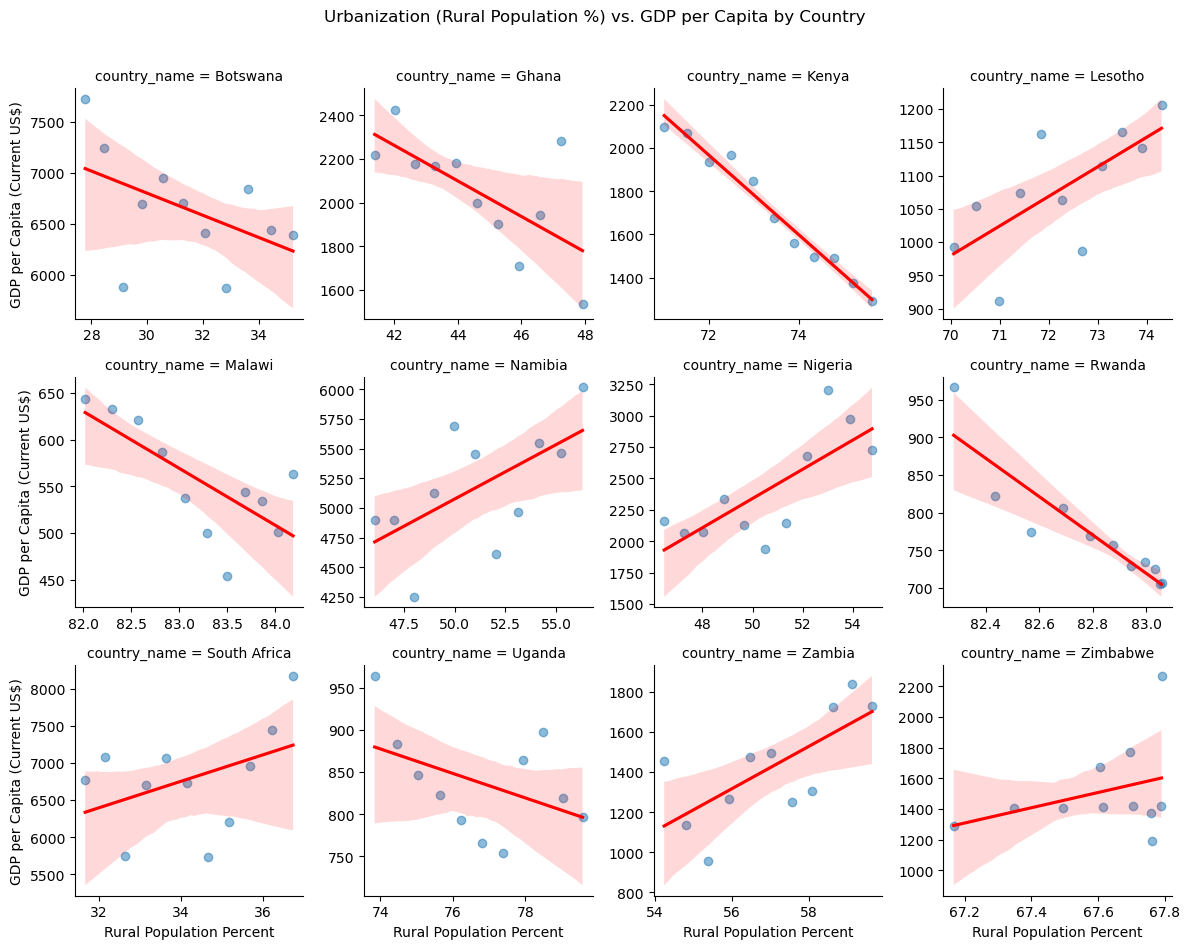

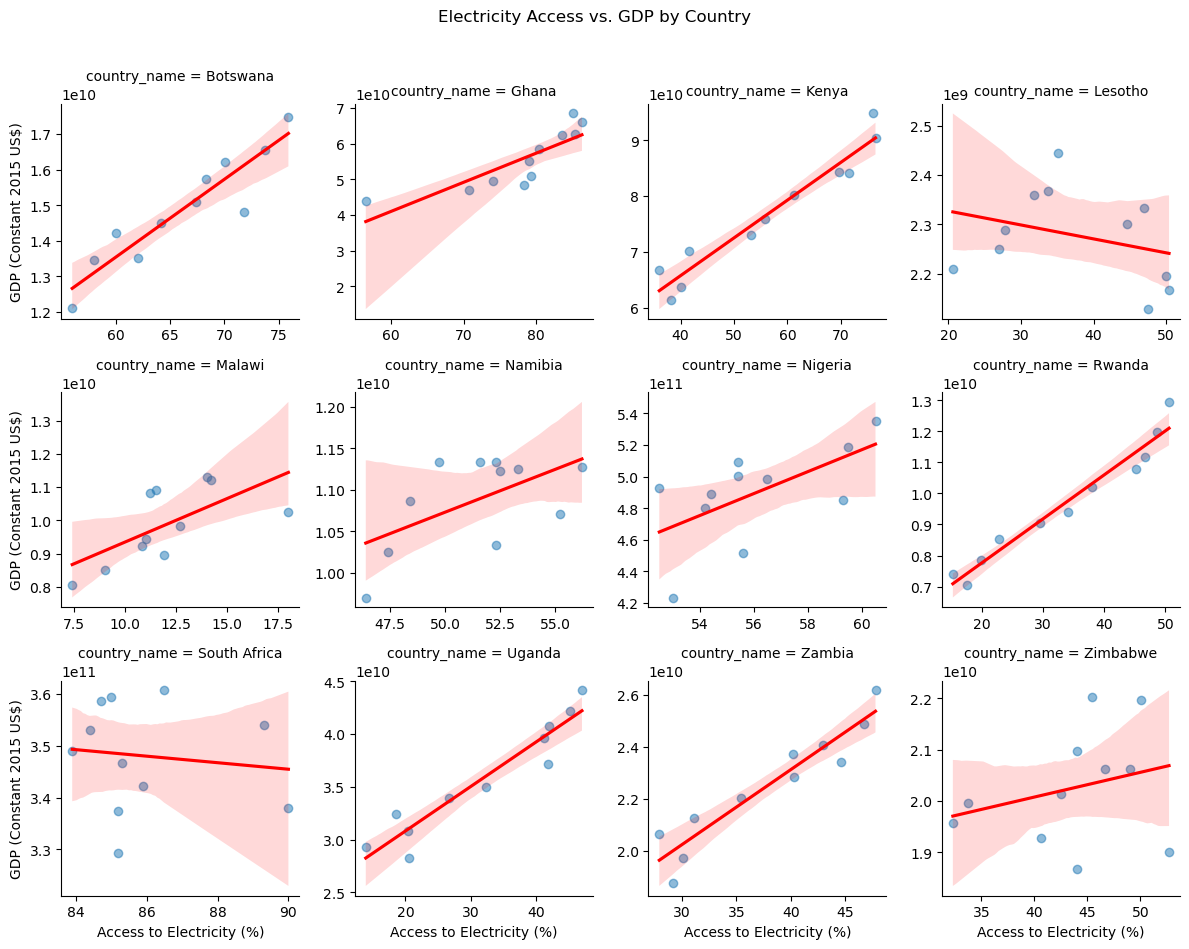

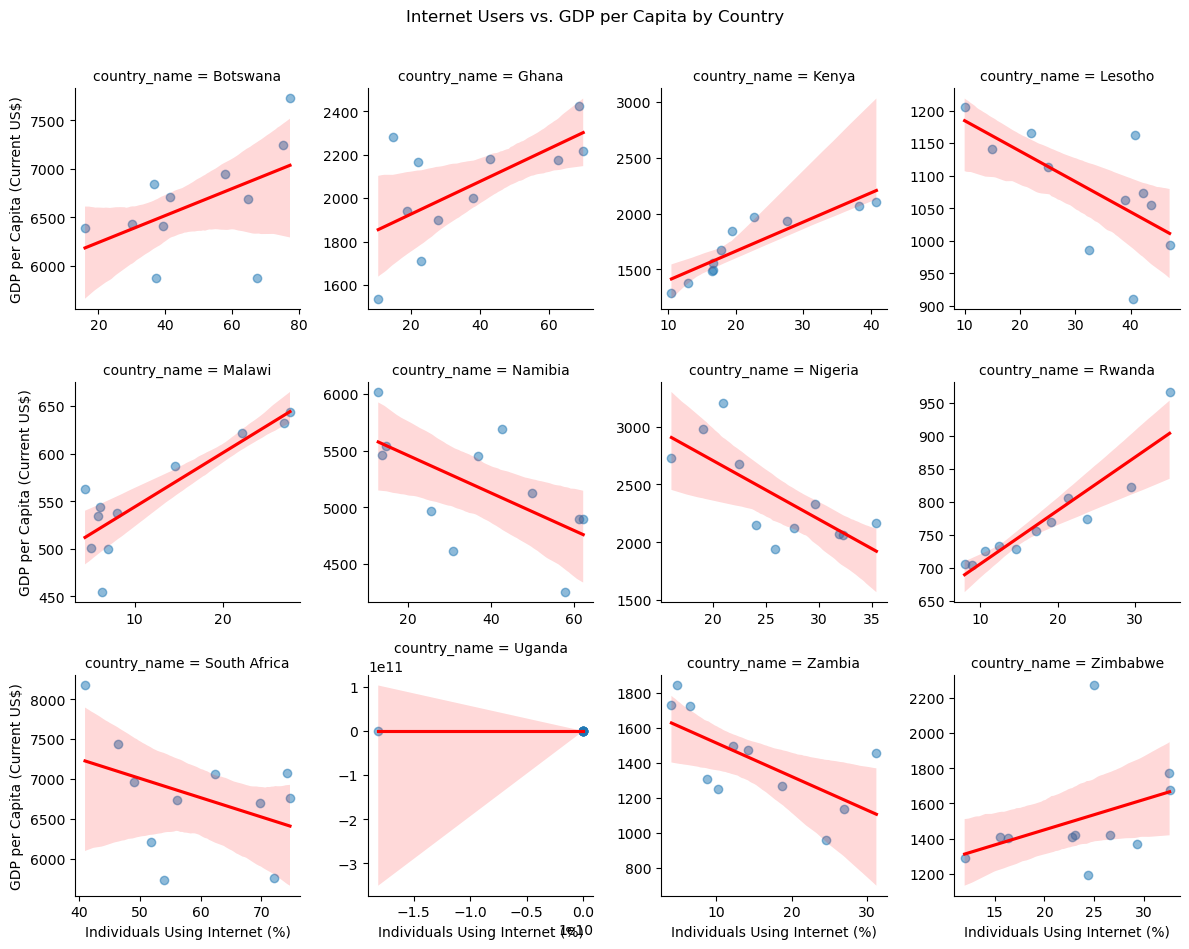

In [5]:
# Creating facet grids for each correlation per country
# 1. Facet plot for Urbanization vs GDP per capita
g = sns.FacetGrid(data, col="country_name", col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.regplot, "rural_population_percent", "gdp_per_capita_current_us$", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
g.set_axis_labels("Rural Population Percent", "GDP per Capita (Current US$)")
g.fig.suptitle("Urbanization (Rural Population %) vs. GDP per Capita by Country", y=1.05)
plt.show()

# 2. Facet plot for Electricity Access vs GDP
g = sns.FacetGrid(data, col="country_name", col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.regplot, "access_to_electricity_percent", "gdp_constant_2015_us$", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
g.set_axis_labels("Access to Electricity (%)", "GDP (Constant 2015 US$)")
g.fig.suptitle("Electricity Access vs. GDP by Country", y=1.05)
plt.show()

# 3. Facet plot for Internet Users vs GDP per capita
g = sns.FacetGrid(data, col="country_name", col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.regplot, "individuals_using_internet_population", "gdp_per_capita_current_us$", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
g.set_axis_labels("Individuals Using Internet (%)", "GDP per Capita (Current US$)")
g.fig.suptitle("Internet Users vs. GDP per Capita by Country", y=1.05)
plt.show()


Here are the facet plots for each correlation by country:

1. Urbanization vs. GDP per capita: Shows how each country's rural population percentage relates to GDP per capita. Some countries follow the inverse trend, while others show varying patterns.
2. Electricity Access vs. GDP: Displays the relationship between electricity access and GDP within each country, highlighting different degrees of correlation.
3. Internet Users vs. GDP per capita: Shows how internet usage relates to GDP per capita on a country-by-country basis.

In [6]:
import statsmodels.api as sm

# Selecting relevant features and the target variable (GDP per capita)
features = data[
    [
        "rural_population_percent",
        "access_to_electricity_percent",
        "access_to_electricity_rural_percent",
        "individuals_using_internet_population"
    ]
]
target = data["gdp_per_capita_current_us$"]

# Add a constant to the model for the intercept
features = sm.add_constant(features)

# Fit the multiple linear regression model
model = sm.OLS(target, features).fit()

# Output the summary of the regression model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     gdp_per_capita_current_us$   R-squared:                       0.705
Model:                                    OLS   Adj. R-squared:                  0.696
Method:                         Least Squares   F-statistic:                     76.04
Date:                        Tue, 12 Nov 2024   Prob (F-statistic):           8.99e-33
Time:                                13:08:09   Log-Likelihood:                -1123.1
No. Observations:                         132   AIC:                             2256.
Df Residuals:                             127   BIC:                             2271.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  9220.3506    982.403      9.386      0.000    7276.352    1.12e+04
rural_population_percent               -108.1910     10.269    -10.536      0.000    -128.512     -87.870
access_to_electricity_percent            -2.1960      8.248     -0.266      0.790     -18.518      14.126
access_to_electricity_rural_percent    -4.66e-05      0.000     -0.270      0.788      -0.000       0.000
individuals_using_internet_population  9.013e-09    6.8e-08      0.133      0.895   -1.25e-07    1.43e-07
==============================================================================
Omnibus:                        0.854   Durbin-Watson:                   0.357
Prob(Omnibus):                  0.653   Jarque-Bera (JB):                0.948
Skew:                          -0.179   Prob(JB):                        0.622
Kurtosis:                       2.791   Cond. No.                     1.46e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

               Summary of the multiple regression model:

1. R-squared (0.705): The model explains approximately 70.5% of the variance in GDP per capita, suggesting a good fit with the selected predictors.

2. Coefficients and Interpretation:

    . Rural Population Percent: The coefficient is -108.19, indicating that a higher rural population percentage is associated with a lower GDP per capita, holding other factors constant. This result is statistically significant (
𝑝
<
0.001
p<0.001).
    . Access to Electricity Percent: This coefficient is -2.20, which is not statistically significant (
𝑝
=
0.790
p=0.790), suggesting that overall electricity access does not have a strong direct relationship with GDP per capita within this model.
    . Access to Electricity in Rural Areas: This coefficient is close to zero and not statistically significant (
𝑝
=
0.788
p=0.788), indicating little direct impact on GDP per capita.
    . Internet Usage: The coefficient is close to zero, and the p-value is 0.895, showing no significant direct effect on GDP per capita.
Interpretation

1. Rural Population has the most significant impact on GDP per capita among the indicators, showing that higher rural population percentages are strongly associated with lower GDP per capita.
2. Electricity Access and Internet Usage do not show strong independent effects on GDP per capita in this model, suggesting potential multicollinearity or that other, unmodeled factors may interact with these indicators.

This model provides insights into how rural population distribution might impact economic outcomes more directly than other infrastructural variables, such as electricity access or internet usage, when analyzed in combination. Further analyses, such as adding interaction terms, could reveal more about potential mitigating effects of internet usage on low electricity access in rural areas.

In [7]:
# Adding interaction terms to the model to explore potential interactions
# Interaction terms: (1) rural population and electricity access, (2) rural population and internet usage
data['rural_x_electricity'] = data['rural_population_percent'] * data['access_to_electricity_percent']
data['rural_x_internet'] = data['rural_population_percent'] * data['individuals_using_internet_population']

# Define the updated features with interaction terms
features_interaction = data[
    [
        "rural_population_percent",
        "access_to_electricity_percent",
        "access_to_electricity_rural_percent",
        "individuals_using_internet_population",
        "rural_x_electricity",
        "rural_x_internet"
    ]
]
features_interaction = sm.add_constant(features_interaction)

# Fit the model with interaction terms
model_interaction = sm.OLS(target, features_interaction).fit()

# Output the summary of the model with interaction terms
model_interaction_summary = model_interaction.summary()
model_interaction_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     gdp_per_capita_current_us$   R-squared:                       0.746
Model:                                    OLS   Adj. R-squared:                  0.734
Method:                         Least Squares   F-statistic:                     61.11
Date:                        Tue, 12 Nov 2024   Prob (F-statistic):           7.75e-35
Time:                                13:18:23   Log-Likelihood:                -1113.4
No. Observations:                         132   AIC:                             2241.
Df Residuals:                             125   BIC:                             2261.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  6701.0580   1506.149      4.449      0.000    3720.202    9681.915
rural_population_percent                -71.6173     19.619     -3.650      0.000    -110.446     -32.788
access_to_electricity_percent           -12.8657     28.430     -0.453      0.652     -69.132      43.400
access_to_electricity_rural_percent    9.857e-06      0.000      0.060      0.953      -0.000       0.000
individuals_using_internet_population    75.2469     22.724      3.311      0.001      30.274     120.220
rural_x_electricity                       0.0801      0.403      0.199      0.843      -0.717       0.877
rural_x_internet                         -1.0190      0.308     -3.311      0.001      -1.628      -0.410
==============================================================================
Omnibus:                        8.269   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.898
Skew:                           0.350   Prob(JB):                      0.00430
Kurtosis:                       4.222   Cond. No.                     1.76e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


                  Run interaction terms for deeper insight?
With the inclusion of interaction terms, the model's 
𝑅
2
R 
2
  has increased to 0.746, indicating that the predictors now explain approximately 74.6% of the variance in GDP per capita. Here’s a breakdown of the significant terms and interactions:

1. •Rural Population Percent•: Still has a significant negative coefficient (-71.62), suggesting that higher rural population percentages are linked to lower GDP per capita.
2. •Internet Usage•: Now has a significant positive coefficient (75.25, 
𝑝
<
0.01
p<0.01), indicating that higher internet usage rates are associated with increased GDP per capita.
3. •Interaction Between Rural Population and Internet Usage•: This interaction term has a significant negative coefficient (-1.02, 
𝑝
<
0.01
p<0.01), suggesting that in areas with a higher rural population percentage, the positive effect of internet usage on GDP per capita is somewhat mitigated.

•Insights•
1. Rural population remains a strong indicator of lower GDP per capita.
2. Internet usage has a positive association with GDP per capita, but its effect diminishes in countries with a higher rural population.
3. No significant effect was found for the interaction between rural population and electricity access, suggesting that electricity access alone does not significantly impact GDP per capita in rural areas within this model.

This analysis suggests that internet infrastructure investments in urban areas may contribute more to economic growth than similar investments in rural areas.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare the data for predictive modeling
# Define the features (independent variables) and target (dependent variable)
X = data[
    [
        "rural_population_percent",
        "access_to_electricity_percent",
        "access_to_electricity_rural_percent",
        "individuals_using_internet_population",
        "rural_x_electricity",
        "rural_x_internet"
    ]
]
y = data["gdp_per_capita_current_us$"]

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 898.1658651954368
Root Mean Squared Error (RMSE): 1298.1709140759715
R-squared (R²): 0.6494826818219357


           Predictive modeling of economic growth 
1. Mean Absolute Error (MAE): 898.17 suggests that, on average, the model's predictions for GDP per capita are off by around $898. This indicates reasonably close predictions but with room for refinement.

2. Root Mean Squared Error (RMSE): 1298.17, slightly higher than the MAE, penalizes larger errors more, indicating some outliers or higher errors in specific predictions. Reducing RMSE through model improvements or removing outliers could enhance precision.

3. R-squared (R²): 0.65, meaning 65% of the variance in GDP per capita is explained by the model, suggesting a strong but not exhaustive model fit.

In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest and Gradient Boosting Regressors
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Train both models on the training data
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Evaluate the models' performance
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

# Display results for both models
print("Random Forest Results:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R-squared:", rf_r2)

print("\nGradient Boosting Results:")
print("MAE:", gb_mae)
print("RMSE:", gb_rmse)
print("R-squared:", gb_r2)


Random Forest Results:
MAE: 736.068126483162
RMSE: 1420.8604598105178
R-squared: 0.5800973757049315

Gradient Boosting Results:
MAE: 597.6215372000962
RMSE: 1182.3740602873975
R-squared: 0.7092260353296116


1. Random Forest Regressor
MAE: 736.07 – The average prediction error is around $736, which shows a slight improvement over the linear model.
RMSE: 1420.86 – Higher than the Gradient Boosting model, indicating more variance in error distribution.
R-squared: 0.58 – Indicates that the Random Forest explains around 58% of the variance in GDP per capita, which is slightly lower than the linear model.
2. Gradient Boosting Regressor
MAE: 597.62 – Lower than both the Random Forest and linear model, indicating better average accuracy in predictions.
RMSE: 1182.37 – The lowest RMSE, suggesting that the Gradient Boosting model handles outliers and variance better than the other models.
R-squared: 0.71 – This is the highest R-squared value among the models, meaning Gradient Boosting explains 71% of the variance in GDP per capita, outperforming the linear and Random Forest models.
Summary & Next Steps
The Gradient Boosting Regressor performs the best across all metrics, particularly excelling in reducing both average error and variance (as shown by lower MAE and RMSE) and providing the best overall fit (R-squared of 0.71).